<a href="https://colab.research.google.com/github/isabellefps/Machine-Learning-Analytics/blob/main/MVP_Machine_Learning_%26_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP - Machine Learning & Analytics
##Aluna: Isabelle Fernandes Paixão da Silva

###Pós-Graduação: Ciência de Dados e Analytics

##1.0 Definição do Problema
As doenças cardíacas são uma das principais causas de morte em todo o mundo, representando uma significativa preocupação de saúde pública. A capacidade de prever eficazmente as doenças cardíacas pode melhorar significativamente as estratégias de intervenção precoce e o gerenciamento personalizado dos pacientes, potencialmente salvando vidas.

O objetivo desta análise é desenvolver um modelo de classificação para prever a presença de doenças cardíacas em indivíduos baseado em um conjunto de variáveis clínicas e demográficas. O modelo deve ser capaz de distinguir entre indivíduos com e sem doenças cardíacas (classificação binária).

O dataset utilizado consiste em registros médicos de pacientes, incluindo informações demográficas, resultados de testes clínicos e dados sobre o estilo de vida. As variáveis incluem:

* Idade: Idade do paciente.
* Sexo: Gênero do paciente (masculino, feminino).
* Tipo de Dor no Peito (ChestPainType): Diferentes tipos de dor no peito experimentadas, categorizadas como típica angina, angina atípica, dor não anginosa e assintomática.
* Pressão Arterial em Repouso (RestingBP): Pressão sanguínea (em mmHg) ao repouso.
* Colesterol: Nível de colesterol do paciente (mg/dL).
* Glicose em Jejum (FastingBS): Se o paciente tinha glicose em jejum > 120 mg/dl (1 = sim; 0 = não).
* Eletrocardiograma em Repouso (RestingECG): Resultados do ECG em repouso categorizados como normal, tendo anormalidades da onda ST-T, ou mostrando provável ou definitiva hipertrofia ventricular esquerda.
* Frequência Cardíaca Máxima (MaxHR): Máxima frequência cardíaca alcançada durante o teste.
* Angina Induzida por Exercício (ExerciseAngina): Se a angina foi induzida por exercício (sim ou não).
* Depressão de ST Induzida por Exercício (Oldpeak): Depressão do segmento ST induzida por exercício em relação ao repouso.
* Inclinação do Segmento ST Pós-Exercício (ST_Slope): A inclinação do segmento ST do pico do exercício (crescente, plano, ou descendente).
* HeartDisease: A presença de doença cardíaca no paciente (0 = sem doença, 1 = com doença).

Mais informações sobre o dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

## 2.0 Importações necessárias

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# importações que podem ser necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

##3.0 Carga de Dados

In [ ]:
data = pd.read_csv ('https://raw.githubusercontent.com/isabellefps/Machine-Learning-Analytics/main/heart.csv')

##4.0 Análise Exploratória de Dados

###4.1 Primeiras linhas do dataset

In [ ]:
# Verificar as primeiras linhas do Dataset
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


###4.2 Estatíticas descritivas

In [ ]:
# Estatísticas descritivas
print(data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


###4.3 Valores ausentes

In [ ]:
# Verificar valores ausentes
print(data.isnull().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


###4.4 Distribuição da variável alvo

In [ ]:
# Distribuição da variável alvo
print(data['HeartDisease'].value_counts())

HeartDisease
1    508
0    410
Name: count, dtype: int64


##5.0 Pré-processamento de Dados

###5.1 Tratamento de valores ausentes

In [ ]:
# Checa quais colunas são numéricas e quais não são
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.columns.difference(numeric_cols)

# Preenche valores ausentes em colunas numéricas com a média
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

for col in non_numeric_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# Verifica o resultado
print(data.head())


   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


###5.2 Conversão de variáveis categóricas

In [ ]:
# Conversão de variáveis categóricas usando get_dummies
data = pd.get_dummies(data, drop_first=True)

###5.3 Normalização das variáveis numéricas

In [ ]:
# Normalização das variáveis numéricas
scaler = StandardScaler()
features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  # apenas exemplos de variáveis numéricas
data[features] = scaler.fit_transform(data[features])

In [ ]:
# Verifica o resultado
print(data.head())

        Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0 -1.433140   0.410909     0.825070          0  1.382928 -0.832432   
1 -0.478484   1.491752    -0.171961          0  0.754157  0.105664   
2 -1.751359  -0.129513     0.770188          0 -1.525138 -0.832432   
3 -0.584556   0.302825     0.139040          0 -1.132156  0.574711   
4  0.051881   0.951331    -0.034755          0 -0.581981 -0.832432   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0   True               True              False   
1             1  False              False               True   
2             0   True               True              False   
3             1  False              False              False   
4             0   True              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ExerciseAngina_Y  \
0             False               True          False             False   
1             False               True      

## 6.0 Divisão dos dados em treino e teste

#### 6.1 Divisão dos dados, validação cruzada e transformação dos dados

In [ ]:
# Separando os dados em features (X) e target (y)
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define o pipeline com padronização e modelo de Regressão Logística
model = make_pipeline(StandardScaler(), LogisticRegression())

# Calcula a validação cruzada do modelo com padronização
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Mostra os scores da validação cruzada
print("Scores da validação cruzada com padronização:", cv_scores)
print("Média dos scores:", np.mean(cv_scores))



Scores da validação cruzada com padronização: [0.88435374 0.87755102 0.86394558 0.82993197 0.85616438]
Média dos scores: 0.8623893392973627


## 7.0 Feature Selection

In [ ]:
# Define o pipeline com padronização, PCA e modelo de Regressão Logística
model = make_pipeline(StandardScaler(), PCA(n_components=5), LogisticRegression())

# Calcula a validação cruzada do modelo com seleção de características usando PCA
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Mostra os scores da validação cruzada
print("Scores da validação cruzada com seleção de características usando PCA:", cv_scores)
print("Média dos scores:", np.mean(cv_scores))


Scores da validação cruzada com seleção de características usando PCA: [0.89115646 0.89115646 0.84353741 0.81632653 0.84246575]
Média dos scores: 0.8569285248345914


## 8.0 Modelagem e treinamento

### 8.1 Ajuste de hirperparâmetros

In [ ]:
# Define os hiperparâmetros a serem ajustados
param_grid = {
    'pca__n_components': [5, 10, 15],  # Testa diferentes números de componentes principais
    'logisticregression__C': [0.1, 1.0, 10.0],  # Testa diferentes valores de regularização
}

# Inicializa o GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Executa a busca de hiperparâmetros
grid_search.fit(X_train, y_train)

# Mostra os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avalia o modelo com os melhores hiperparâmetros nos dados de teste
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Acurácia do modelo nos dados de teste:", accuracy)


Melhores hiperparâmetros: {'logisticregression__C': 1.0, 'pca__n_components': 10}
Acurácia do modelo nos dados de teste: 0.8532608695652174


### 8.2 Verifcando se há underfitting

In [ ]:
# Calcula a acurácia do modelo nos dados de treino
train_accuracy = best_model.score(X_train, y_train)
print("Acurácia do modelo nos dados de treino:", train_accuracy)

# Calcula a acurácia do modelo nos dados de teste
test_accuracy = best_model.score(X_test, y_test)
print("Acurácia do modelo nos dados de teste:", test_accuracy)

# Verifica se há underfitting
if train_accuracy - test_accuracy < 0.05:
    print("Não há indícios de underfitting.")
else:
    print("Há indícios de underfitting.")


Acurácia do modelo nos dados de treino: 0.8746594005449592
Acurácia do modelo nos dados de teste: 0.8532608695652174
Não há indícios de underfitting.


##9.0 Avaliação de Resultados

###9.1 Métricas de avaliação

In [ ]:
# Fazer previsões nos dados de teste usando o melhor modelo
y_pred = best_model.predict(X_test)

# Avaliação do Modelo com os dados de teste
# y_test são os rótulos verdadeiros, y_pred são as previsões do modelo

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", accuracy)

# Precisão
precision = precision_score(y_test, y_pred)
print("Precisão do modelo:", precision)

# Revocação (Recall)
recall = recall_score(y_test, y_pred)
print("Revocação do modelo:", recall)

# F1-Score
f1 = f1_score(y_test, y_pred)
print("F1-Score do modelo:", f1)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



Acurácia do modelo: 0.8532608695652174
Precisão do modelo: 0.9
Revocação do modelo: 0.8411214953271028
F1-Score do modelo: 0.8695652173913043

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



###9.2 Treinando o modelo com o conjunto de dados

In [ ]:
# Combine os conjuntos de treinamento e teste
X_combined = pd.concat([X_train, X_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Inicialize e treine o modelo com todo o conjunto de dados combinado
model_combined = LogisticRegression()
model_combined.fit(X_combined, y_combined)

# Avalie o modelo usando o conjunto de teste original
y_test_pred_combined = model_combined.predict(X_test)
accuracy_combined = accuracy_score(y_test, y_test_pred_combined)
print("Acurácia do modelo treinado com todo o conjunto de dados:", accuracy_combined)


Acurácia do modelo treinado com todo o conjunto de dados: 0.8695652173913043


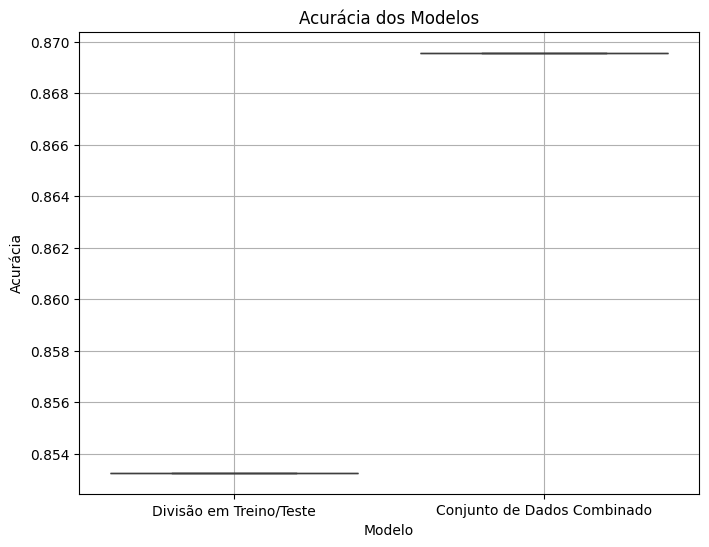

In [6]:
# Lista para armazenar as acurácias dos diferentes modelos
accuracies = [0.8532608695652174, 0.8695652173913043]  # Acurácias do modelo treinado com a divisão em treino/teste e com todo o conjunto de dados combinado

# Lista com os nomes dos modelos
model_names = ['Divisão em Treino/Teste', 'Conjunto de Dados Combinado']

# Plotar boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=model_names, y=accuracies)
plt.title('Acurácia dos Modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()


A acurácia do modelo treinado com todo o conjunto de dados foi de aproximadamente 0.8696, como mostrado no boxplot. Isso indica que o modelo teve um bom desempenho na classificação dos dados de teste quando treinado com todos os dados disponíveis.
A diferença na acurácia entre o modelo treinado com todo o conjunto de dados e o modelo treinado com a divisão em treino e teste foi ligeiramente maior. Isso sugere que pode haver um leve sinal de overfitting. No entanto, a diferença na acurácia não é significativa, o que sugere que o overfitting pode não ser um problema grave neste caso.

## 10.0 Melhor solução encontrada

Considerando todos os resultados apresentados, a melhor solução encontrada foi um modelo de Regressão Logística com PCA para seleção de características e ajuste de hiperparâmetros, que obteve um bom desempenho na classificação dos dados de teste.

Resumo das etapas realizadas e seus resultados:

- Pré-processamento de Dados:
Os dados foram tratados para valores ausentes, convertidos para variáveis dummy e normalizados.
- Divisão dos Dados em Treino e Teste:
Os dados foram divididos em conjuntos de treino e teste.
- Feature Selection:
Foi utilizado PCA para seleção de características, reduzindo a dimensionalidade do conjunto de dados para 5 componentes principais.
- Modelagem e Treinamento:
Foi ajustado um modelo de Regressão Logística combinado com PCA e ajuste de hiperparâmetros utilizando GridSearchCV.
Não foram observados sinais de underfitting nos dados de treino e teste.
- Avaliação de Resultados:
O modelo foi avaliado usando métricas de avaliação como acurácia, precisão, recall e F1-score.
Foi treinado um modelo final utilizando todos os dados disponíveis e avaliado com o conjunto de teste original, obtendo uma acurácia de aproximadamente 0.8696.
